## Regression

In [22]:
#Regression
## supervised -> training phase
## traiing phase -> give (x,y), the machine learns the h function to map x to y
## sample 1 => x1 = gold, x2 = egg, y = stock price
## x1 = 10, x2 = 20, y = 51
## 1*x1 + 2*x2  = y^ = 50 (loss = y - y^ =51-50 = 1)
## h function is basically a= 1,b=2,ax1 + bx2 + c  = y 
## h = hypothesis function

## Linear regression -> linear function of h

In [23]:
#regression
## y is continous value
## what if y is not strictly a continous value -> lets say integers
## it is still fine, but a fined-grained model will not be psssible


In [24]:
#h function
# if i have one feature
# h(x) = ax + b 
# a = coefficient, intercept, theta, beta
# b = bias, error, noise

# if i have two features
#h(x1,x2) = ax + bx2 + c
#a,b = coefficient, intercept, theta, beta
# c =bias, error, noise

# if i have three features
# h(x1,x2,x3) = ax + bx2 + cx3 + d
# y = ax + bx2 + cx3 + d

#### Linear regression example

In [25]:
# generate a function y = ax+b, where a = 2, b = -5
# i want 500 points of this relationship
# My x to be in range between 0 to 10
import numpy as np
rng = np.random.RandomState(1)

x = 20*rng.rand(500) # numpy array between 0 to 1 shape = (500, )
# adding some noise, any values between 0 and 1
y = 2*x + -5 + 20*rng.rand(500)

(0.0, 10.0)

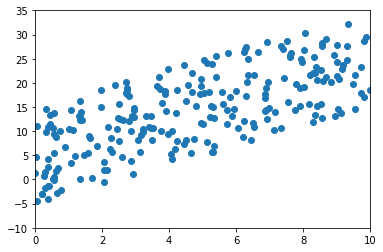

In [26]:
#plot them on a scatter plot
import matplotlib.pyplot as plt
#when you do plt.scatter/plot they expect of (something, ) or (something,1)
# y should be the same shape of x
plt.scatter(x,y)
plt.ylim(-10,35)
plt.xlim(0,10)

In [27]:
# ready to use scikit learn linear regression API to fit the model -> training

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import sklearn.model_selection as model_selection

# one key important thing to know
# To best of my best knowledge, but all sklearn API expect your X
# to be shape of (number of samples, number of features)
# if your model is a regression, then the y is of shape (number of samples, ) or (number of sameples, 1)
# if your model is binary classification, then the y is of shape (number pf samples, ) or (number of samples,1)
# if your model is mullticlass cclassification, then the Y is of shape (number of samples, number of classes)
#  #### this gives you possibilities for all classes

# x -> X
# current shape of x
# (500, ) -> (500,1)
X = x[:,np.newaxis]
# X = x.reshape(500,1)
# X = x.reshape(-1,1)
# X = x.reshape(X.shape[0],1)

#current shape of y
# (500, ) -> is ok no need to reshape

#how do I know that the model i just train is good


Text(0.5, 32, '$adjusted r^2$ = 1.18')

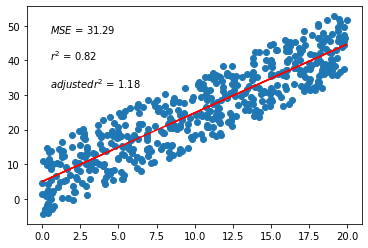

In [28]:
# the wrong way

model = LinearRegression(fit_intercept = True) # you want to include intercept too
type(model)

#any model has a fucntion .fit()
#.fit(X,y) it takes two parameters
#This X should follow the shape above specified

#This model will now learn the function h
#nothing is returned here
#the learn function is incoperated inside this model object
model.fit(X,y)

#try to predict 
#.predict will use the learnt function h to predict y given x
yhat = model.predict(X)
yhat.shape

#plot for my actual data
plt.scatter(X,y)
#line of best fit
plt.plot(X,yhat,color='r')

#calculate accuracy/loss
#loss = mean_squared error -> takes two ys which y and yhat
#these two ys should have the same shape
plt.text(0.5,48,f"$MSE$ = {mean_squared_error(y,yhat):.2f}")
# there is no base line.


#another common measure for loss in regression is r^2
# how far you are from the mean
# interpretationn

# case 1
# SSE model < SSE total -> good news
# SSEmodel/SSEtotal (0,1)
# r^ = 1 - SSEmodel/SSEtotal (close to one)

# case 2
# SSE model = SSE total -> bad news
# SSEmodel/SSEtotal (1)
# r^2 = 0

# case 3 
# SSE model > SSE total -> worst
# SSE model/SSE total (1,inf)
# r^ negative 
# therefore, r^2 has a range of -inf to one
plt.text(0.5,40,f"$r^2$ = {r2_score(y,yhat):.2f}")

#another measure is called adjusted r2 
n = X.shape[0] #number of samples normally m but this tine we use m
p = X.shape[1] #number of features (n)
adjusted_rsqrt = 1 - (1-r2_score(y,yhat))*(1-n)/(n-p-1)
plt.text(0.5,32,f"$adjusted r^2$ = {adjusted_rsqrt:.2f}")

Text(0.5, 32, '$adjusted r^2$ = 1.18')

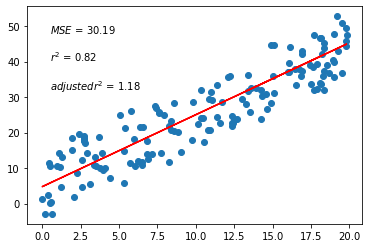

In [29]:
# the correct way

model = LinearRegression(fit_intercept = True) # you want to include intercept too
type(model)

#any model has a fucntion .fit()
#.fit(X,y) it takes two parameters
#This X should follow the shape above specified

#measure the accuracy based on the unseen data
#means => splot data into training and testing data
#means that -> 80/20, 70/30
#but if the data is really huge, then its ok to take 90/10
#manual way
#shape = (500, )

#X_train -> 70% data
#X_test -> 30% data
#y_train -> 70% data
#y_test -> 30% data

#return a tuple of X_train,X_test,y_train,y_test therefore we need to type 
X_train,X_test,y_train,y_test= model_selection.train_test_split(X,y,test_size = 0.3,random_state=99)

#This model will now learn the function h
#nothing is returned here
#the learn function is incoperated inside this model object
model.fit(X_train,y_train)

#try to predict 
#.predict will use the learnt function h to predict y given x
yhat = model.predict(X_test)
yhat.shape

#plot for my actual data
plt.scatter(X_test,y_test)
#line of best fit
plt.plot(X_test,yhat,color='r')

#calculate accuracy/loss
#loss = mean_squared error -> takes two ys which y and yhat
#these two ys should have the same shape
plt.text(0.5,48,f"$MSE$ = {mean_squared_error(y_test,yhat):.2f}")
# there is no base line.


#another common measure for loss in regression is r^2
# how far you are from the mean
# interpretationn

# case 1
# SSE model < SSE total -> good news
# SSEmodel/SSEtotal (0,1)
# r^ = 1 - SSEmodel/SSEtotal (close to one)

# case 2
# SSE model = SSE total -> bad news
# SSEmodel/SSEtotal (1)
# r^2 = 0

# case 3 
# SSE model > SSE total -> worst
# SSE model/SSE total (1,inf)
# r^ negative 
# therefore, r^2 has a range of -inf to one
plt.text(0.5,40,f"$r^2$ = {r2_score(y_test,yhat):.2f}")

#another measure is called adjusted r2 
n = X.shape[0] #number of samples normally m but this tine we use m
p = X.shape[1] #number of features (n)
adjusted_rsqrt = 1 - (1-r2_score(y_test,yhat))*(1-n)/(n-p-1)
plt.text(0.5,32,f"$adjusted r^2$ = {adjusted_rsqrt:.2f}")

In [30]:
# training data -> fit() 

# validation data -> for fine tuning your odel hyperparameters

# testing data -> checing accurancy
# 70:20:10      

### Polynomial Regression

In [31]:
#Polynomial Regression
# y =  ax+b

# feature engineering
# create some new feature that could better model the relationship between x and y
# if i choose the degree = 3, we get y = ax^3 +bx^2 +cx +d


In [32]:
x = np.array([1,2,3,4,5])
X = x.reshape(-1,1)

print("=========X========")
print(X)
from sklearn.preprocessing import PolynomialFeatures
poly_X = PolynomialFeatures(degree=3).fit_transform(X)
print("=========poly X========")
print(poly_X)

#how do we know which deg we need to use
#visualization
#cross validation -> trail and errors
#and find the best deg with minimum loss

=========X========
[[1]
 [2]
 [3]
 [4]
 [5]]
=========poly X========
[[  1.   1.   1.   1.]
 [  1.   2.   4.   8.]
 [  1.   3.   9.  27.]
 [  1.   4.  16.  64.]
 [  1.   5.  25. 125.]]


In [33]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
boston = load_boston()
type(boston) #-> bunch
# boston.DESCR
# boston.feature_names

#just get one feature -> 12th feature, #% lower status of the population
X=boston.data[:,12][:,np.newaxis]
y = boston.target
#check shape,already in the perfect shape
# X.shape
# y.shape

Text(30, 40, '$r^2$ = 0.50')

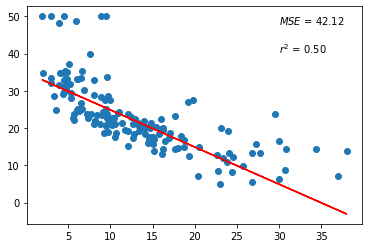

In [34]:
model = LinearRegression(fit_intercept = True)
X_train,X_test,y_train,y_test= model_selection.train_test_split(X,y,test_size = 0.3,random_state=99)
model.fit(X_train,y_train)
yhat = model.predict(X_test)

#plot for my actual data
plt.scatter(X_test,y_test)
#line of best fit
plt.plot(X_test,yhat,color='r')
plt.text(30,48,f"$MSE$ = {mean_squared_error(y_test,yhat):.2f}")
plt.text(30,40,f"$r^2$ = {r2_score(y_test,yhat):.2f}")

=========DEG 1 ==========
MSE = 42.12
r^2 = 0.50
Coeff:  [ 0.         -0.99802125]
=========DEG 3 ==========
MSE = 36.18
r^2 = 0.57
Coeff:  [ 0.00000000e+00 -4.69678383e+00  2.04808005e-01 -3.09536685e-03]
=========DEG 5 ==========
MSE = 38.18
r^2 = 0.55
Coeff:  [ 0.00000000e+00 -1.62795495e+01  1.83993701e+00 -1.01714563e-01
  2.62943436e-03 -2.54441322e-05]


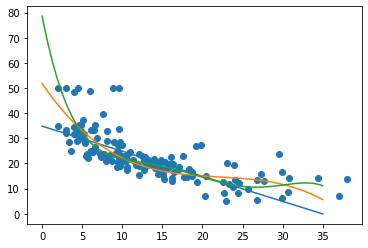

In [35]:
## Please take 5 mins to 
# 1. feature engineering using polynomial features def=1,3,5
# and set them as your new X
# 2. fit() with linear regression
# 3. mse and r2

for ix,deg in enumerate([1,3,5]):
    model = make_pipeline(PolynomialFeatures(deg), LinearRegression()) # change x axis to be x^2 --> linear 
    model.fit(X_train,y_train)
#     X_train,X_test,y_train,y_test= model_selection.train_test_split(X_poly,y,test_size = 0.3,random_state=99)

    yhat = model.predict(X_test)
    
    X_plot = np.linspace(0,35,100)[:,np.newaxis]
    y_plot = model.predict(X_plot)
    plt.plot(X_plot,y_plot)
    print(f"=========DEG {deg} ==========")
    
    print(f"MSE = {mean_squared_error(y_test,yhat):.2f}")
    print(f"r^2 = {r2_score(y_test,yhat):.2f}")
    
    print("Coeff: ", model.named_steps['linearregression'].coef_)
#     print("Coeff: ", model.named_steps[''].coef_)    
plt.scatter(X_test,y_test)
# *steps -> tuple **kwarg -> dictionary

In [36]:
for ix,deg in enumerate([1,3,5]):
    poly_X_train = PolynomialFeatures(degree = deg).fit_transform(X_train)
    poly_X_test = PolynomialFeatures(degree = deg).fit_transform(X_test)    
    model = LinearRegression()
    
    model.fit(poly_X_train,y_train)
    yhat = model.predict(poly_X_test)
    
    print(f"=========DEG {deg} ==========")
    
    print(f"MSE = {mean_squared_error(y_test,yhat):.2f}")
    print(f"r^2 = {r2_score(y_test,yhat):.2f}")    
    
    n,p = X.shape[0],X.shape[1]
    adjusted_rsqrt = 1-(1-r2_score(y_test,yhat))*(n-1)/(n-p-1)
    print("adjusted r^2: ",f"{adjusted_rsqrt:2f}")
    print("Coeff: ",model.coef_)

#r^2 is less strict

=========DEG 1 ==========
MSE = 42.12
r^2 = 0.50
adjusted r^2:  0.501479
Coeff:  [ 0.         -0.99802125]
=========DEG 3 ==========
MSE = 36.18
r^2 = 0.57
adjusted r^2:  0.571809
Coeff:  [ 0.00000000e+00 -4.69678383e+00  2.04808005e-01 -3.09536685e-03]
=========DEG 5 ==========
MSE = 38.18
r^2 = 0.55
adjusted r^2:  0.548150
Coeff:  [ 0.00000000e+00 -1.62795495e+01  1.83993701e+00 -1.01714563e-01
  2.62943436e-03 -2.54441322e-05]


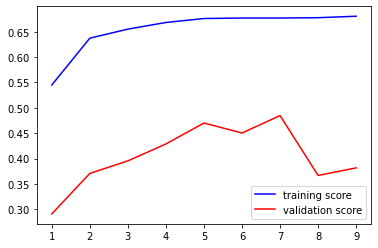

In [37]:
# Validation curve

# so which deg will have a better training score vs validation score
# -> a model can have high training score, but low validation score -> over fitting
# -> a model can have low training score, but low validation score -> underfitting
# -> a model that has fairly cloest training and validation score -> testing on unseen data is just as good as the training phase

from sklearn.model_selection import validation_curve
degree = np.arange(1,10)
model = make_pipeline(PolynomialFeatures(), LinearRegression()) #nothing inside polynomial features(    ), validation curve will put it for me
# any functions that has .pip can be put inside pipeline
#(estimator,X,y)
#cv number of cross validation
train_score, val_score = validation_curve(model, X,y, param_name="polynomialfeatures__degree", param_range =degree, cv=7)

plt.plot(degree,np.median(train_score, axis=1),color = 'blue',label='training score')
plt.plot(degree,np.median(val_score, axis=1),color = 'red',label='validation score')
plt.legend()
#best = where red is nearest to the blue
#from 8 onwards => overfitting

# intotal there are three types of scores,
# 1. training score
# 2. validation score
# 3. testing score
# usually validation score is very similar testin score


In [38]:
# Learning curve
# a model will generally overfit a small dataset
# a model will generally underfit a small dataset
# Accuracy depends on the sample size

# plot accuracy as a function of a sample size
# adding more data will not improve the validation score

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(model, X,y ):
    cv = ShuffleSplit(n_splits = 10,test_size=0.3,random_state = 42)
# test_size = 0.3 will be used as a testing set for validation  
# n_splits = iterations
# normal cv, shuffleSplit cv, 'StratifiedSplit = randomly pick 30% of the data' -> chaky's fav, oneleafout
# use cv = m --> use the test size with only 1 value! takes a lot of time
# the parameters tat chnge between each model is the degree of your polynomial
# we dont need to worry of how many degrees to test --> GridSearch()
# eg from 1 to 10 -> this we need to put in, we know this by visualizing the data
# shuffle only once
    train_sizes, train_scores,test_scores,fit_times, _ = learning_curve(model, X, y,cv = cv,n_jobs = -1,return_times = True)
#     print(train_sizes.shape)
#     print(train_scores.shape)
#     print(test_scores.shape)
#     print(fit_times.shape)
    # 5 sample sizes, cross validations of 10
    
    #calculate some mean
    train_scores_mean = np.mean(train_scores, axis =1)
    train_scores_std = np.std(train_scores,axis = 1)
    test_scores_mean = np.mean(test_scores, axis =1)
    test_scores_std = np.std(test_scores,axis = 1)
    fit_times_mean = np.mean(fit_times,axis=1)
    fit_times_std = np.std(fit_times,axis=1)
    print(train_scores_mean)
    #n_job = -1 use all the core of your computer, 1= 1 core    
# _ dont need the last one

    _,ax = plt.subplot(3,1,figsize=(7,15))
    
    #plot learning curve
    ax[0].grid()
    ax[0].set_title("Learning Curves")
    ax[0].plot(train_sizes,train_scores_mean,'o-',color ='r',label ="Training score")
    ax[0].fill_between(train_sizes,train_scores,mean - train_scores_std, train_scores_mean + train_scores_std,alpha = 0.1, color='r')
    ax[0].plot(train_sizes,test_scores_mean,'')
model = make_pipeline(PolynomialFeatures(5), LinearRegression())

plot_learning_curve(model,X,y)

[0.70180189 0.69640098 0.68988962 0.70123108 0.69271313]


ValueError: Illegal argument(s) to subplot: (3, 1)

<Figure size 432x288 with 0 Axes>

Best params: {'linearregression__normalize': True, 'polynomialfeatures__degree': 8}


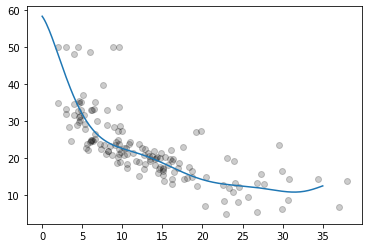

In [39]:
from sklearn.model_selection import GridSearchCV
# notice that I did not specify the degree of Polynomial Features

model = make_pipeline(PolynomialFeatures(), LinearRegression())

#specify the parameters range in dictionary, so that GridSearchCV
#can eat it
#please try alll possible degree from 1 to 10
param_grid = {'polynomialfeatures__degree':np.arange(1,10),
            'linearregression__normalize':[True,False]}

# model(PolynomialFeatures())
# help(PolynomialFeatures)

#main three arguments(model, param_grid,cv)
#if you simply say cv = int, it will use the default cv algorithm
#but if you say cv = ShuffleSplit, e.g. then it will become that
#what does it return?
#it return a special kind of estimator, with the same function fit()
grid = GridSearchCV(model, param_grid,cv = 7)

#grid.fit()
#fit will try all possible params defined in param_grid
#and record the results
grid.fit(X_train,y_train)

#print the best params
# you must ALWAYS USE GRIDSEARCH (of course you cannot use Grid Search in NeuralNetworks, but certainly possilbe in sckit-learn)

print("Best params:" , grid.best_params_)

# help(grid)

# best model
# manuall construct my model
#model=make_pipeline....blahb;ah = nooo
model = grid.best_estimator_
model.fit(X,y)
yhat = model.predict(X_test)

#scatter plot of actualy data
plt.scatter(X_test,y_test,color='k',alpha = 0.2)


#plot the best fit line
#we cannot use y_hat and X_test to plot a line
#because all the points are not really continuous
#create our manual X points 
#and use model.predict to actually get its corresponding y
X_plot = np.linspace(0,35,200)[:,np.newaxis]
y_plot = model.predict(X_plot)
plt.plot(X_plot,y_plot)

Best params: {'linearregression__normalize': True, 'polynomialfeatures__degree': 8}


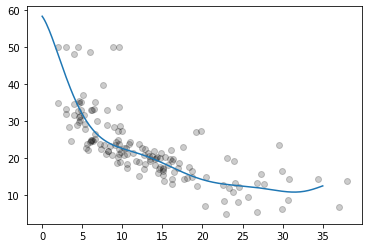

In [40]:
from sklearn.linear_model import Lasso
#try to do a lasso regression
#perform grid search
#over lasso alpha (lambda) -> 0.1,0.01,0.001, 0.0001
#print out the accuracy

grid = GridSearchCV(model, param_grid,cv = 7)
param_lasso = {'polynomialfeatures__':np.arange(1,5),
               'lasso__alpha': np.logspace(-1,-4,10)} 
grid = GridSearchCV(model, param_grid,cv = 7)
grid.fit(X_train,y_train)
# print(model)
model = make_pipeline(PolynomialFeatures(), Lasso(normalize=True))
model.fit(X_train,y_train)
print("Best params:" , grid.best_params_)
model = grid.best_estimator_
model.fit(X,y)
yhat = model.predict(X_test)
plt.scatter(X_test,y_test,color='k',alpha = 0.2)
X_plot = np.linspace(0,35,200)[:,np.newaxis]
y_plot = model.predict(X_plot)
plt.plot(X_plot,y_plot)


In [41]:
from sklearn.linear_model import Ridge
#try to do a ridge regresision
#perform grid search
#over ridge alpha (lambda) -> 0.1,0.01,0.001, 0.0001
param_ridge = {'polynomialfeatures__':np.arange(1,5),
               'ridge__alpha': np.logspace(-1,-4,10)} 
# print(model)
model = make_pipeline(PolynomialFeatures(), Ridge(normalize=True))
model.fit(X_train,y_train)
print("Best params:" , grid.best_params_)
# help(Ridge)

from sklearn.linear_model import ElasticNet
#try to do an elastic net regression
#over polynomial features -> np.arange(1,5)
#perform grid search
#over elasticnet alpha (lambda) -> 0.1,0.01,0.001, 0.0001
#over elasticnet l1 ratio (lambda) -> np.linspace(0,1,3)
param_ElasticNet = {'polynomialfeatures__':np.arange(1,5),
               'elasticnet__alpha': np.logspace(1,4,10),
                'elasticnet__l1_ratio': np.linspace(0,1,3)} 
help(ElasticNet)
model = make_pipeline(PolynomialFeatures(), ElasticNet(normalize=True))
model.fit(X_train,y_train)
print("Best params:" , grid.best_params_)

Best params: {'linearregression__normalize': True, 'polynomialfeatures__degree': 8}
Help on class ElasticNet in module sklearn.linear_model._coordinate_descent:

class ElasticNet(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, sklearn.linear_model._base.LinearModel)
 |  ElasticNet(alpha=1.0, *, l1_ratio=0.5, fit_intercept=True, normalize=False, precompute=False, max_iter=1000, copy_X=True, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
 |  
 |  Linear regression with combined L1 and L2 priors as regularizer.
 |  
 |  Minimizes the objective function::
 |  
 |          1 / (2 * n_samples) * ||y - Xw||^2_2
 |          + alpha * l1_ratio * ||w||_1
 |          + 0.5 * alpha * (1 - l1_ratio) * ||w||^2_2
 |  
 |  If you are interested in controlling the L1 and L2 penalty
 |  separately, keep in mind that this is equivalent to::
 |  
 |          a * L1 + b * L2
 |  
 |  where::
 |  
 |          alpha = a + b and l1_ratio = a / (a + b)
 |  
 | 

In [45]:
X_train.shape


(354, 1)

In [43]:
y_train.shape

(354,)

In [44]:
#Step 1 prepare your data
#X_train, X_test have intercepts that are being concatenated to the data
#[1,features
#1, heatures....]

#making sure our X_train has same sample size as y_train
assert X_train.shape[0] == y_train.shape[0]

# initialize our w
# we dont need to do X.shape[1] + 1 because our X_train already has the intercelt
w = np.zeros(X.shape[1])
#define the learning rate
# later on you will learn that it should be better to make it slowly decreaasing
#once we performa lot of iterations, we want the update to slow down, so it convergese better

alpha = 0.01

#define our max_iter
#typical to call it epochs <-- ml people like to call it

max_iter = 500

